In [1]:
import xarray as xr
import os, json, sys
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
sys.path.insert(0, r'/Users/Niell Lab/Documents/GitHub/FreelyMovingEphys/')

In [3]:
from project_analysis.jumping.jump_utils import pooled_jump_analysis

In [4]:
from util.paths import find

In [5]:
base = r'E:\jumping\redone_side_network'
pooled_data = xr.open_dataset(os.path.join(base, 'pooled_jump_data.nc'))
early_pooled_data = xr.open_dataset(os.path.join(base, 'early_pooled_jump_data.nc'))
jumpprep_pooled_data = xr.open_dataset(os.path.join(base, 'jumpprep_pooled_jump_data.nc'))
late_pooled_data = xr.open_dataset(os.path.join(base, 'alte_pooled_jump_data.nc'))

In [6]:
with open(os.path.join(base, 'jump_analysis_config.json'), 'r') as fp:
    config = json.load(fp)

In [7]:
combined_by_animal = pooled_jump_analysis(pooled_data, config, 'combined')
early_by_aniumal = pooled_jump_analysis(early_pooled_data, config, 'early')
jumpprep_by_animal = pooled_jump_analysis(jumpprep_pooled_data, config, 'jumpprep')
late_by_animal = pooled_jump_analysis(late_pooled_data, config, 'late')

C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\xarray\core\alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\xarray\core\alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\xarray\core\alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\xarray\core\alignment.py:307: FutureWarning: Ind

In [9]:
early_by_animal = early_by_aniumal.copy()

In [10]:
early_by_animal

<xarray.Dataset>
Dimensions:       (frame: 1983, jump_params: 7, variable: 293)
Coordinates:
  * variable      (variable) object '071420_PV-CHR11P1LT_001' ... '071720_PV-...
  * frame         (frame) int64 0 1 2 3 4 5 6 ... 1977 1978 1979 1980 1981 1982
  * jump_params   (jump_params) object 'head_pitch' 'mean_eye_th' ... 'th_phi'
Data variables:
    PV-CHR11P2RT  (variable, frame, jump_params) float64 nan nan nan ... nan nan
    PV-CHR11P2LT  (variable, frame, jump_params) float64 nan nan nan ... nan nan
    J157BRT       (variable, frame, jump_params) float64 nan nan nan ... nan nan
    PV-CHR11P1TT  (variable, frame, jump_params) float64 nan nan nan ... nan nan
    J157BLT       (variable, frame, jump_params) float64 nan nan nan ... nan nan
    PV-CHR11P1LT  (variable, frame, jump_params) float64 26.09 -1.807 ... nan
    J158BLT       (variable, frame, jump_params) float64 nan nan nan ... nan nan
    J158BRT       (variable, frame, jump_params) float64 nan nan nan ... nan nan

In [42]:
div_early = early_by_animal.sel(jump_params='eye_th_div')#.mean(dim='variable',skipna=True)
div_jumpprep = jumpprep_by_animal.sel(jump_params='eye_th_div')#.mean(dim='variable',skipna=True)

In [100]:
def jump_hist(div, axis=0):
    all_bins = np.arange(-25,26)
    all_hist = np.zeros([np.size(div, axis), len(all_bins)-1])
    for jump_num in range(np.size(div, axis)):
        hist, bin_edges = np.histogram(div[jump_num], bins=np.arange(-25,26), density=True)
        all_hist[jump_num] = hist
    return all_hist

In [43]:
early = div_early.drop('variable').rename({'variable':'jump'}).to_array()
jumpprep = div_jumpprep.drop('variable').rename({'variable':'jump'}).to_array()

In [82]:
early_bins = jump_hist(early)
jumpprep_bins = jump_hist(jumpprep)

In [39]:
np.shape(early)

(8, 293, 1983)

In [72]:
def mean_within_animal(data):
    data_mean = data.mean(dim='jump',skipna=True)
    out = []
    for var in range(np.size(data_mean,0)):
        out.append(list(data_mean[var]))
    return np.array(out)

In [73]:
early = mean_within_animal(early)

(8, 1983)


In [74]:
jumpprep = mean_within_animal(jumpprep)

(8, 121)


C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using t

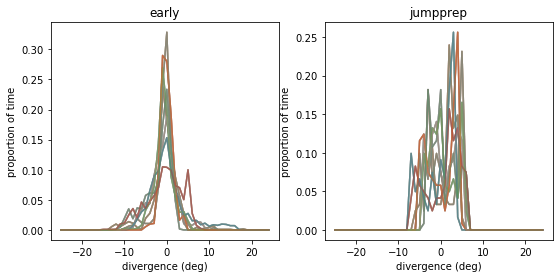

In [119]:
lags = np.arange(-25,25)
plt.subplots(1,2, figsize=(9,4))
for animal in range(8):
    plt.subplot(1,2,1)
    plt.title('early')
    plt.plot(lags, early_bins.T, alpha=0.3)
    plt.ylabel('proportion of time'); plt.xlabel('divergence (deg)')
    plt.subplot(1,2,2)
    plt.title('jumpprep')
    plt.ylabel('proportion of time')
    plt.xlabel('divergence (deg)')
    plt.plot(lags, jumpprep_bins.T, alpha=0.3)
plt.show()

In [83]:
axisplot = 0
y1 = np.mean(early_bins,axisplot)
err1 = np.std(np.array(early_bins,dtype=np.float64),axisplot)/np.sqrt(np.size(early_bins,axisplot))
y2 = np.mean(jumpprep_bins,axisplot)
err2 = np.std(np.array(jumpprep_bins,dtype=np.float64),axisplot)/np.sqrt(np.size(jumpprep_bins,axisplot))

In [78]:
np.shape(y1)

(1983,)

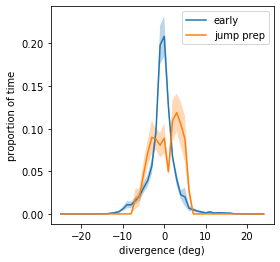

In [84]:
lags = np.arange(-25,25)
plt.figure(figsize=(4,4))
plt.plot(lags, y1)
plt.fill_between(lags, y1-err1, y1+err1, alpha=0.3)
plt.plot(lags, y2)
plt.fill_between(lags, y2-err2, y2+err2, alpha=0.3)
plt.ylabel('proportion of time'); plt.xlabel('divergence (deg)')
plt.legend(['early', 'jump prep'])

In [112]:
early_by_animal

<xarray.Dataset>
Dimensions:       (frame: 1983, jump_params: 7, variable: 293)
Coordinates:
  * variable      (variable) object '071420_PV-CHR11P1LT_001' ... '071720_PV-...
  * frame         (frame) int64 0 1 2 3 4 5 6 ... 1977 1978 1979 1980 1981 1982
  * jump_params   (jump_params) object 'head_pitch' 'mean_eye_th' ... 'th_phi'
Data variables:
    PV-CHR11P2RT  (variable, frame, jump_params) float64 nan nan nan ... nan nan
    PV-CHR11P2LT  (variable, frame, jump_params) float64 nan nan nan ... nan nan
    J157BRT       (variable, frame, jump_params) float64 nan nan nan ... nan nan
    PV-CHR11P1TT  (variable, frame, jump_params) float64 nan nan nan ... nan nan
    J157BLT       (variable, frame, jump_params) float64 nan nan nan ... nan nan
    PV-CHR11P1LT  (variable, frame, jump_params) float64 26.09 -1.807 ... nan
    J158BLT       (variable, frame, jump_params) float64 nan nan nan ... nan nan
    J158BRT       (variable, frame, jump_params) float64 nan nan nan ... nan nan

In [114]:
pitch_early = early_by_animal.sel(jump_params='head_pitch')#.mean(dim='variable',skipna=True)
pitch_jumpprep = jumpprep_by_animal.sel(jump_params='head_pitch')#.mean(dim='variable',skipna=True)

In [115]:
pitch_early = pitch_early.drop('variable').rename({'variable':'jump'}).to_array()
pitch_jumpprep = pitch_jumpprep.drop('variable').rename({'variable':'jump'}).to_array()

In [163]:
pitch_early.isel(frame=range(-120,-1))

<xarray.DataArray (variable: 8, jump: 293, frame: 119)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * frame        (frame) int64 1863 1864 1865 1866 1867 ... 1978 1979 1980 1981
    jump_params  <U10 'head_pitch'
  * variable     (variable) <U12 'PV-CHR11P2RT' 'PV-CHR11P2LT' ... 'J158BRT'
Dimensions without coordinates: jump

In [182]:
lastgood = []
for i in range(8):
    lastgood.append(np.argwhere(~np.isnan(pitch_early.isel(variable=i).values))[-1][-1])

In [183]:
len(lastgood)

8

In [180]:
np.shape(pitch_early.isel(variable=i).values)

(293, 1983)

In [ ]:
for i in range(8):
    
    this_lastgood = pitch_early.isel(frame=range(-(120+this_lastgood),-this_lastgood))

In [164]:
pitch_early_avg = mean_within_animal()
pitch_jumpprep_avg = mean_within_animal(pitch_jumpprep)

(8, 119)
(8, 121)


In [165]:
pitch_early_bins = jump_hist(pitch_early_avg)
pitch_jumpprep_bins = jump_hist(pitch_jumpprep_avg)

C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [167]:
np.shape(pitch_early_bins)

(8, 50)

In [169]:
np.shape(pitch_jumpprep_bins)

(8, 50)

C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using t

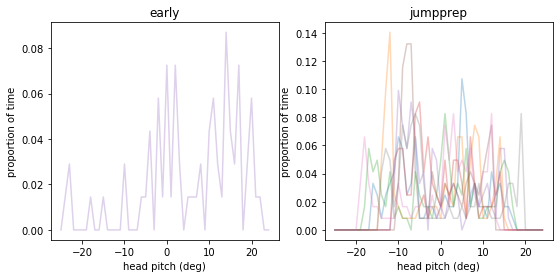

In [172]:
lags = np.arange(-25,25)
plt.subplots(1,2, figsize=(9,4))
for animal in range(8):
    plt.subplot(1,2,1)
    plt.title('early')
    plt.ylabel('proportion of time'); plt.xlabel('head pitch (deg)')
    plt.plot(lags, pitch_early_bins[animal].T, alpha=0.3)
    plt.subplot(1,2,2)
    plt.title('jumpprep')
    plt.ylabel('proportion of time'); plt.xlabel('head pitch (deg)')
    plt.plot(lags, pitch_jumpprep_bins[animal].T, alpha=0.3)
plt.show()

In [1]:
import xarray as xr

In [3]:
xr.open_dataset('/home/niell_lab/data/jumping/timebin_eyecams_2sec/071620_J157BRT_014/071620_J157BRT_014_early_Reye.nc')

<xarray.Dataset>
Dimensions:  (frame: 0)
Coordinates:
  * frame    (frame) int64 
Data variables:
    *empty*